# Matrix Multiplication - Python VS Julia

## Goals:
1. Create a function that creates two random N x M matrices
2. Make it so the function will always output matrices that can be multiplied together
3. create a program/function that can do matrix multiplication
4. Test this function for matrices of varrying sizes
5. Record the time it takes to do the multiplication and do many tests

### Imports:

In [5]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import time
%matplotlib inline

### Random Matrix Creation:

In [14]:
def matrix_create(n,m):
    '''This function takes in the desired dimensions for the matrices and creates
    two random matrices full of integers from 0 to 10, and one result matrix full of zeroes. 
    The matrices created are always able to be multiplied together.
    n = size of first dimension
    m = size of second dimension
    returns: two random matrices and result matrix'''
    

    a = [[random.randint(0, 10) for i in range(n)] for j in range(m)]
    b = [[random.randint(0, 10) for i in range(m)] for j in range(n)]
    answer = [[random.randint(0, 0) for i in range(m)] for j in range(n)]
    
    #List comprehension sourced from: https://www.dreamincode.net/forums/topic/413327-creating-nxm-matrix-without-numpy/
    return a, b, answer

### Matrix Multiplication:

In [19]:
#Create a time array for storing the different times of calculation
times = []

#Loop through matrices of size 100x100 to 3000x3000 by increments of 100 and record calculation time 
for n in range(100,100000,100):
    #Unpack the randomly created ixi matrices 
    a, b, answer = matrix_create(n,n)
    
    #Time the calculation by taking an inital and final time
    t0 = time.time()
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                answer[i][j] += a[i][k] * b[k][j]
    t1 = time.time()

    #Add calculated time to time list
    times.append(t1-t0)
    
    #print the results of the calculation
    print('Time for calculation of',n,'x',n,'matrix:',t1-t0,'seconds')

Time for calculation of 100 x 100 matrix: 0.3543987274169922 seconds
Time for calculation of 200 x 200 matrix: 2.870328426361084 seconds
Time for calculation of 300 x 300 matrix: 9.721766948699951 seconds
Time for calculation of 400 x 400 matrix: 23.548012733459473 seconds
Time for calculation of 500 x 500 matrix: 47.27581477165222 seconds
Time for calculation of 600 x 600 matrix: 80.53771567344666 seconds
Time for calculation of 700 x 700 matrix: 129.52871465682983 seconds
Time for calculation of 800 x 800 matrix: 211.4736783504486 seconds
Time for calculation of 900 x 900 matrix: 276.0918560028076 seconds
Time for calculation of 1000 x 1000 matrix: 367.4866943359375 seconds


### Pulling results from Julia:

In [20]:
julia_times = pd.read_csv("JuliaTimes.csv", header = None)

### Comparison:

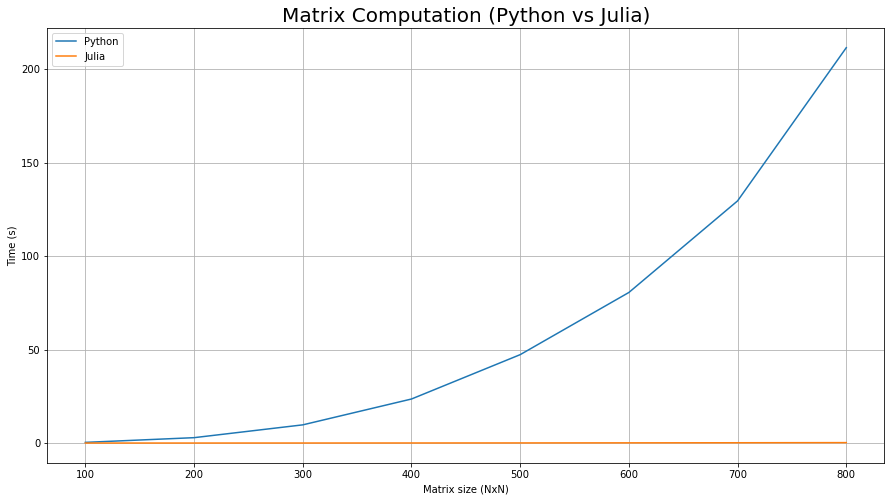

In [26]:
matrices2 = np.arange(100, 900, 100)

fig = plt.figure(figsize=(15,8))
plt.plot(matrices2, times[0:8], label = 'Python')
plt.plot(matrices2,julia_times[0:8], label ='Julia')
plt.legend()
plt.grid()
plt.title('Matrix Computation (Python vs Julia)', size = 20)
plt.ylabel('Time (s)')
plt.xlabel('Matrix size (NxN)')
fig.savefig('Speed_comparison.png')

ValueError: x and y must have same first dimension, but have shapes (30,) and (10,)

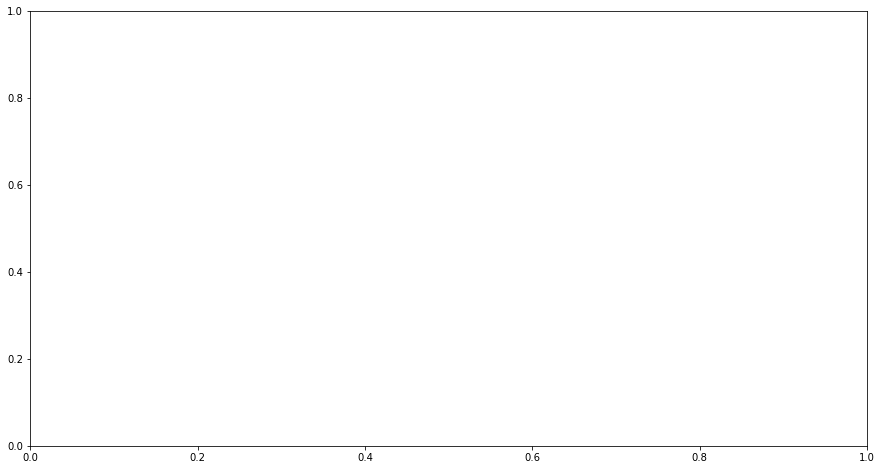

In [28]:
matrices = np.arange(100, 3100, 100)

plt.figure(figsize=(15,8))
plt.plot(matrices, times, label = 'Python')
plt.plot(matrices,julia_times, label ='Julia')
plt.legend()
plt.grid()
plt.title('Matrix Computation (Python vs Julia, Zoomed Out)', size = 20)
plt.ylabel('Time (s)')
plt.xlabel('Matrix size (NxN)')

In [27]:
julia = julia_times.values.tolist()

new_array = []
for y in range(len(times)):
    new_array.append(times[y]%julia[y][0])

fig2 = plt.figure(figsize=(15,8))
plt.plot(matrices, new_array, label = 'Python')

plt.legend()
plt.grid()
plt.title('Matrix Computation (Python vs Julia, Zoomed Out)', size = 20)
plt.ylabel('Python Time / Julia Time')
plt.xlabel('Matrix size (NxN)')
fig2.savefig('Speed_Comparison2.png')

NameError: name 'matrices' is not defined

<Figure size 1080x576 with 0 Axes>